In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,33.349998,36.639999,31.740000,32.340000,32.340000,0.0
2022-05-03,31.760000,32.820000,29.059999,29.250000,29.250000,0.0
2022-05-04,29.120001,29.420000,24.940001,25.420000,25.420000,0.0
2022-05-05,25.969999,33.200001,25.780001,31.200001,31.200001,0.0
2022-05-06,32.230000,35.340000,29.830000,30.190001,30.190001,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,4130.609863,4169.810059,4062.510010,4155.379883,4155.379883,4.474060e+09
2022-05-03,4159.779785,4200.100098,4147.080078,4175.479980,4175.479980,3.877530e+09
2022-05-04,4181.180176,4307.660156,4148.910156,4300.169922,4300.169922,4.236210e+09
2022-05-05,4270.430176,4270.430176,4106.009766,4146.870117,4146.870117,4.197620e+09
2022-05-06,4128.169922,4157.689941,4067.909912,4123.339844,4123.339844,4.254300e+09


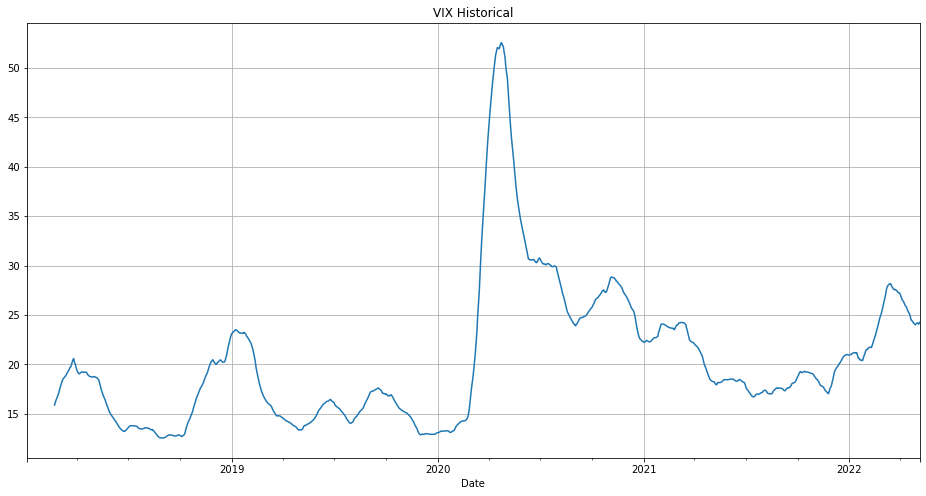

In [4]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(16,8), title='VIX Historical', grid=True)

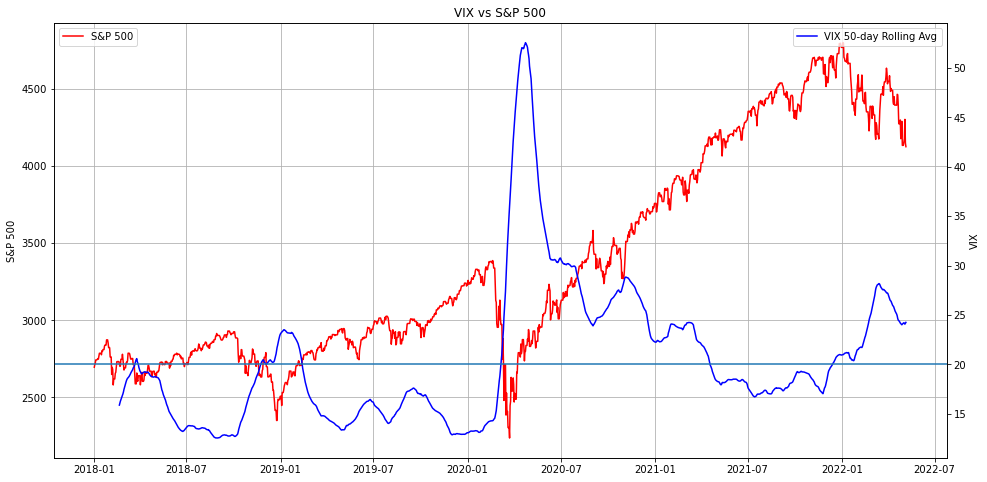

In [5]:
# Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)